## Goal of this project is to predict the price of a car based on its features such as brand, model, age, engine HP etc.

 <center> Start of video: ML Zoomcamp 2.2 - Data Preparation

In [3]:
import numpy as np
import pandas as pd

In [4]:
#data='https://github.com/bhasarma/mlcoursezoom-camp/blob/debb9a929e3667e3fc1d7e2782c3f3c56f898b19/wk02-ch02-car-price/data.csv'

In [5]:
#!wget $data

In [6]:
df = pd.read_csv('data.csv') #data.csv is already downloaded on my local directory

In [7]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df['Transmission Type']

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11909    AUTOMATIC
11910    AUTOMATIC
11911    AUTOMATIC
11912    AUTOMATIC
11913    AUTOMATIC
Name: Transmission Type, Length: 11914, dtype: object

In [9]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [10]:
df.columns.str.lower()

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'market category', 'vehicle size', 'vehicle style',
       'highway mpg', 'city mpg', 'popularity', 'msrp'],
      dtype='object')

In [11]:
df.columns  = df.columns.str.lower().str.replace(' ','_')

In [12]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [13]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [14]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [15]:
df.dtypes=='object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [16]:
df.dtypes[df.dtypes=='object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [17]:
df.dtypes[df.dtypes=='object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [18]:
list(df.dtypes[df.dtypes=='object'].index)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [19]:
strings_coloumns = list(df.dtypes[df.dtypes=='object'].index)
strings_coloumns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [20]:
for col in strings_coloumns:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [21]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [22]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

<center> End of video: ML Zoomcamp 2.2 - Data Preparation <br>

    
***

## 2.3 Exploratory Data Analysis

### Beginning of video: ML Zoomcamp 2.3 - Exploratory Data Analysis

In [23]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [24]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [25]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [26]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Distribution of price

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
# above line is needed so that all the plots can be displayed on notebook

<AxesSubplot:xlabel='msrp', ylabel='Count'>

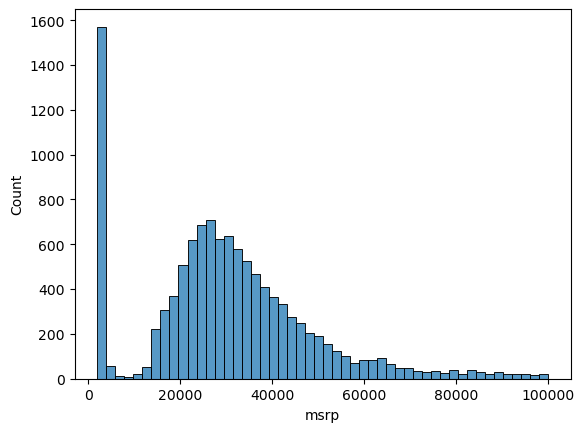

In [28]:
sns.histplot(df.msrp[df.msrp < 100000], bins =50) #long-tail distribution

In [29]:
np.log([0+1, 1+1,10+1, 100+1, 1000+1, 10000+1])  # log(0) doesn't exist

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

In [30]:
np.log1p([0, 1, 10, 100, 1000, 10000])  
#1p stands for +1, this means 1 is added to each number

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

In [31]:
price_logs = np.log1p(df.msrp) #use log disribution to get rid of the tail

In [32]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

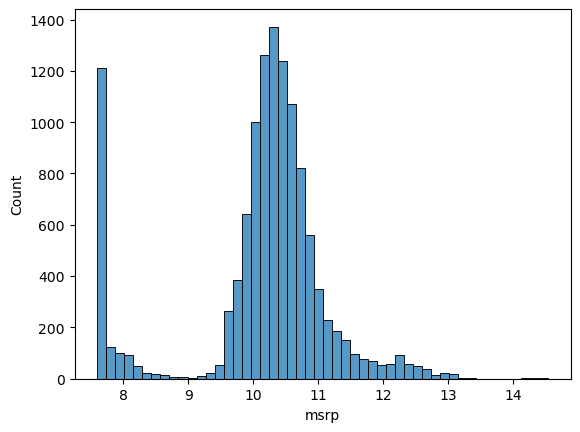

In [33]:
sns.histplot(price_logs, bins =50) #Normal distribution

### Missing values

In [34]:
df.isnull().sum() #nan means not a number or, in pandas it usually means this value is missing

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### End of video: ML Zoomcamp 2.3 - Exploratory Data Analysis

_________________

## 2.4 Setting up the validation framework

### Beginning of video: ML Zoomcamp 2.4 - Setting Up The Validation Framework 

First we will divide the data set into 60-20-20 for training, validation and test.

In [35]:
n = len(df)

n_val = int(n*0.2)  # n_val is length of validation data set
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [36]:
n, n_val+n_test+n_train

(11914, 11914)

In [37]:
df.iloc[10:20] # goes from 10 to 19

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
12,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,44400
13,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,19,3916,37200
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
15,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,25,18,3916,48250
16,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,43550
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000


### Shuffling the indices/data

The idea here is to break if there is some accidental order/pattern in the data

In [38]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [39]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [40]:
np.random.seed(2)  #so that result is reproducible
np.random.shuffle(idx)

In [41]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [42]:
df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [43]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [44]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [45]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [46]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [47]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [48]:
y_train = np.log1p(df_train.msrp.values) #values gives numpy array instead of pandas series directly
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [49]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [50]:
del df_train['msrp']  #we should delete them, because we accidentaly might use it.
del df_val['msrp']
del df_test['msrp']

In [51]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


### End of video: ML Zoomcamp 2.4 - Setting Up The Validation Framework

_____________

# 2.5 Linear regression

### Beginning of video: ML Zoomcamp 2.5 - Linear Regression

Linear regression is a model that we use for so many regression problems, meaning that we use for predicting numbers. Ouput is a number.

In [52]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [53]:
xi = [453, 11, 86]  #engine_hp, city_mpg and popularity is our feature matrix

In [54]:
w0 = 7.17 # wo is the biased term
w = [0.01, 0.04, 0.002]

***

$$\Large g(x_i) = w_0 + \sum \limits _{j=0} ^{3-1} (w_{j} * X_{i,j})$$

***

In [55]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j]*xi[j]
    return pred

In [56]:
linear_regression(xi)

12.312

In [57]:
np.expm1(12.312) #exponent minus 1

222347.2221101062

In [58]:
np.log1p(222347.2221101062)

12.312

### End of video: ML Zoomcamp 2.5 - Linear Regression
***

## 2.6 Linear regression (vector form)

### Beginning of video: ML Zoomcamp 2.6 - Linear Regression: Vector Form

A compact form of the equation above is:

$$\Large g(x_{i})= w_{0}+x_{i}^{T}w $$

T stands for transpose of matrix $x_{i}$

In [59]:
def dot(xi,w):
    n = len(xi)
    
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [60]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [61]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [62]:
[1] + [1, 2, 3]

[1, 1, 2, 3]

In [63]:
def linear_regression(xi):
    xi = [1]+xi
    return dot(xi, w_new)

In [64]:
linear_regression(xi)

12.312

In [65]:
xi = [453, 11, 86]
w0 = 7.17 # biased term
w = [0.01, 0.04, 0.002] 

In [66]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [67]:
def linear_regression(X):
    return X.dot(w_new)

In [68]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### End of video: ML Zoomcamp 2.6 - Linear Regression: Vector Form
***

## 2.7 Training a linear regression model

### Beginning of video: ML Zoomcamp 2.7 - Training Linear Regression: Normal Equation

Training the model is about finding the matrix w from equation $ Xw = y$
However, X is not necessarily a square matrix, thereefore its inverse doesn't always exist. However we can make it a square matrix by multiplying it with its transpose $X^{T}$

Thus:

$$ Xw =y$$
$$ X^{T}Xw = X^{T}y$$

product $X^{T}X$ is now a square matrix and its inverse exist (not always though, we'll talk about it later). This matrix is called Gram Matrix. 

Now we can multiply both sides by inverse of Gram matrix to get weight matrix w:

$$ (X^{T}X)^{-1} (X^{T}X)w = (X^{T}X)^{-1} X^{T}y$$
$$ Iw = (X^{T}X)^{-1} X^{T}y$$
$$ w = (X^{T}X)^{-1} X^{T}y$$

For further understanding of the maths behind, book titled The Elements of Statistical Learning can be referred. 


In [69]:
def train_linear_regression(X,y):
    pass

In [70]:
X = [
    [148,   24, 1385],
    [132,   25, 2031],
    [453,   11,   86],
    [158,   24,  185],
    [172,   25,  201],
    [413,   11,   86],
    [38,    54,  185],
    [142,   25,  431],
    [453,   31,   86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [71]:
#ones = np.ones(X.shape[0])  #to add the biased terms
#ones

In [72]:
#X = np.column_stack([ones, X])
#X

In [73]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000 ]

In [74]:
XTX = X.T.dot(X) #Gram matrix
XTX

array([[ 696471,   44115,  718540],
       [  44115,    7146,  118803],
       [ 718540,  118803, 6359986]])

In [75]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [76]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [77]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 26.08419498, 286.12285934,   3.93813107])

In [78]:
w0 = w_full[0]
w  = w_full[1:]

In [79]:
w0, w

(26.0841949768029, array([286.12285934,   3.93813107]))

In [80]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [81]:
train_linear_regression(X,y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

### End of video: ML Zoomcamp 2.7 - Training Linear Regression: Normal Equation

****

## 2.8 Car price baseline model

### Beginning of video: ML Zoomcamp 2.8 - Baseline Model for Car Price Prediction Project

In this section, we will build the baseline model for predicting price of a car.

In [82]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [83]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [84]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [85]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [86]:
X_train = df_train[base].fillna(0)
X_train

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [87]:
X_train[base].isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [88]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [89]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [90]:
w0, w = train_linear_regression(X_train,y_train)
w0, w

(7.927257388070117,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [91]:
y_pred = w0+X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

In [92]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<AxesSubplot:ylabel='Count'>

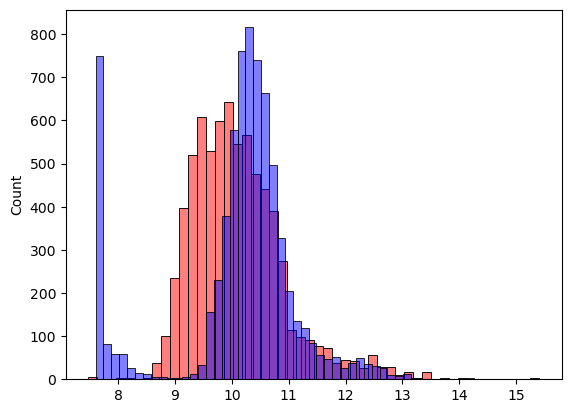

In [93]:
sns.histplot(y_pred, color = 'red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### End of video: ML Zoomcamp 2.8 - Baseline Model for Car Price Prediction Project
***

## 2.9 Root mean square error (RMSE)

### Beginning of video: ML Zoomcamp 2.9 - Root Mean Squared Error

Here we will talk about evaluating regression models and one way of doing this is root mean squared error.

Formula for RMSE is:

$$\Large RMSE = \sqrt{\frac{1}{m}\sum \limits _{i=1}^{m}(g(x_{i})-y_{i})^{2}} $$

where, $g(x_{i})$ is predicted value and $y_{i}$ is actual value.

In [137]:
def rmse(y, y_pred):
    se = (y - y_pred)**2  #squared error
    mse = se.mean()
    return np.sqrt(mse)

In [139]:
rmse(y_train, y_pred)

ValueError: operands could not be broadcast together with shapes (7150,) (2382,) 

### End of video: ML Zoomcamp 2.9 - Root Mean Squared Error
***

## 2.10 validating the model

### Beginning of video: ML Zoomcamp 2.10 - Computing RMSE on Validation Data

In [96]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

In [97]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [98]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.76

### End of video: ML Zoomcamp 2.10 - Computing RMSE on Validation Data
***

## 2.11 Simple feaure engineering

### Beginning of video: ML Zoomcamp 2.11 - Feature Engineering

In [99]:
df_train.head() # we want to use the variable year

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [100]:
df_train.year.max()

2017

In [101]:
df_train.year.min()

1990

In [102]:
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [103]:
def prepare_X(df):
    df = df.copy()  #we work with a copy inside tiis function, so that original dataframe will not change
    
    df['age'] = df.year.max() - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [104]:
X_train = prepare_X(df_train)

In [105]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [106]:
X_train #last feature here is now age

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [107]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.52

We see that using year as a feature improved our model significantly from 0.76 to 0.52

<AxesSubplot:ylabel='Count'>

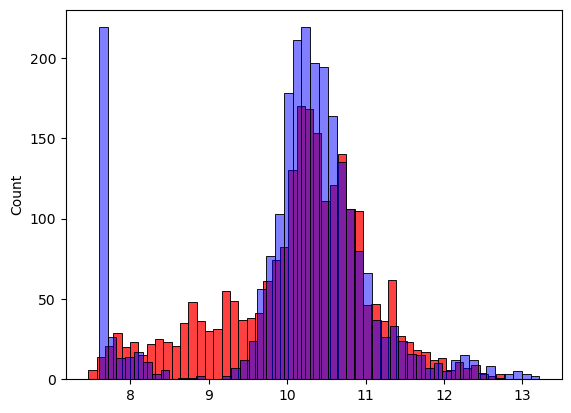

In [108]:
sns.histplot(y_pred, color = 'red', bins=50)
sns.histplot(y_val, color='blue', bins=50, alpha=0.5)

### End of video: ML Zoomcamp 2.11 - Feature Engineering

***

## 2.12 Categorical Variables

### Beginning of video: ML Zoomcamp 2.12 - Categorical Variables

Catagorical variables are columns like model, make and so on. These are typically strings and not numbers.

In [109]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [110]:
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

Number of doors are also categorical variables, eventhough they are numbers. This is because there are only distinct numbers of categorical variables 2,3 and 4 may be. We want to use them for our models because they might be important. Cars with 2 doors might be more expensive than cars with 4 doors.

In [111]:
df_train.number_of_doors == 2

0        True
1       False
2       False
3       False
4       False
        ...  
7145     True
7146     True
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [112]:
(df_train.number_of_doors == 2).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [113]:
for v in [2,3,4]:
    df_train['num_of_doors_%s' % v]=(df.number_of_doors == v).astype('int')

In [114]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_of_doors_2,num_of_doors_3,num_of_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,1,0,0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,1,0,0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,1,0,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [115]:
def prepare_X(df):
    df = df.copy()  #we work with a copy inside tiis function
    features = base.copy()
    
    df['age'] = df.year.max() - df.year   
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v]=(df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [116]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [117]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.52

Previous result: 0.5172055461058335 <br>
There is very slight improvement from 3rd decimal point. So number of doors feature is not very useful.<br>
If we use make (brand name) is sho0uld be preety useful.

In [118]:
df.make.nunique()

48

We have a lots of unique vales in make feature. Lets look at the most ones. For these we have value_counts()

In [119]:
df.make.value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

In [120]:
df.make.value_counts().head() #to see the top 5

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [121]:
df.make.value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object')

In [122]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [123]:
def prepare_X(df):
    df = df.copy()  #we work with a copy inside tiis function
    features = base.copy()
    
    df['age'] = df.year.max() - df.year   
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v]=(df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)  
    
    for v in makes:
        df['make_%s' % v]=(df.make == v).astype('int')
        features.append('make_%s' % v) 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [124]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.51

There is a 1% improvement now. But it is still not as drastic as when we included year or, age.

In [125]:
df_train.dtypes # lets look again at dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_of_doors_2         int64
num_of_doors_3         int64
num_of_doors_4         int64
dtype: object

In [126]:
categorical_variables=['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [127]:
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [128]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [129]:
def prepare_X(df):
    df = df.copy()  #we work with a copy inside tiis function
    features = base.copy()
    
    df['age'] = df.year.max() - df.year   
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v]=(df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)  
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)]=(df[c] == v).astype('int')
            features.append('%s_%s' % (c,v)) 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [130]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

30.5

Now this value is significantly worse than before. So something went wrong.

In [131]:
int(w0)

11755893098228356

In [132]:
w

array([ 2.56988617e-01, -1.38294929e+01, -8.65997948e-02,  2.64886913e+00,
       -1.47801941e-03,  9.75290052e-01,  1.67609664e+03,  1.68829508e+03,
        1.66325665e+03, -3.16320230e+00,  7.79124613e-01,  8.66411402e+00,
       -7.90701327e+00,  1.54903232e+00,  1.26274789e+02,  1.11149281e+02,
        1.17981326e+02,  1.20295953e+02,  1.20725290e+02, -9.26473482e+15,
       -9.26473482e+15, -9.26473482e+15, -9.26473482e+15, -9.26473482e+15,
       -2.49115828e+15, -2.49115828e+15, -2.49115828e+15, -2.49115828e+15,
        3.07027708e+00,  4.12918270e+00, -9.38274122e-01, -4.66874571e+00,
       -1.26627609e+01,  8.14636451e+00,  1.16013581e+01,  1.28932025e+01,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

In [133]:
int(w0)

11755893098228356

Something went wrong above. We wanted to improve our model, but we just made it worse. In the next lesson we will see why this happens.

### End of video: ML Zoomcamp 2.12 - Categorical Variables

# 2.13 Regilarization (or, regularization)

### Beginning of video: ML Zoomcamp 2.13 - Regularization

In [134]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [135]:
XTX= X.T.dot(X)  # this is Gram matrix
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

We see above that in the Gram matrix two columns are same. This means one column is a linear combination of another column. Therefore, they are not invertible.

In [136]:
np.linalg.inv(XTX) #inverse doesn't exist

LinAlgError: Singular matrix

XTX is a singular matrix. This was not a problem for our case though. The reason for that is that data is numerically not super clean.  Now if we add small number 0.00000001 to 5 as below:

In [ ]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]
X = np.array(X)
X

In [ ]:
XTX= X.T.dot(X)
XTX

In [ ]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

Now we don't have the problem of singular matrix, but we find very large numbers in inverse matrix.

In [ ]:
y = [1, 2, 3, 1, 2, 3]

In [ ]:
XTX_inv.dot(X.T).dot(y)

Here we see very large numbers. This problem happens if we have almost identical matrix.

To solve this problem we can add a small number to the diagonal of this matrix. By adding a small number to the diagonal, we make sure that each columns are different.

In [ ]:
XTX = [
    [1.0001, 2, 2], 
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.001],
    ]
XTX = np.array(XTX)
XTX

In [ ]:
np.linalg.inv(XTX)

In [ ]:
XTX = XTX + 0.01* np.eye(3)

In [ ]:
np.linalg.inv(XTX)

Now we don't have this problem and this step of adding a small number to the diagonal elements is called Regularization. We control it.In a way 0.01 above is a parameter, regularization parameter. How much we add to the diagonal element. 

In [ ]:
def train_linear_regression_reg(X,y,r = 0.001): #reg stands for relularized. r is regularization parameter.
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r* np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train, r=0.01)

X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

We see some improvement of approx. 0.05 compared to previous after regularization. Thus by adding a number to the diagonal we were able to control our weights to regularize our model. r is a parameter. If we set it too high, model becomes worse. If we set it too small, it has negligible effect on weights. 

<br>**WE NEED TO FIND WHAT IS THE BEST or, OPTIMUM VALUE OF $r$**


### End of video: ML Zoomcamp 2.13 - Regularization
***

# 2.14 Tuning the model

Finding the best value of regularization parameter r

### Beginning of video: ML Zoomcamp 2.14 - Tuning the Model

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train,y_train, r=r)

    X_val = prepare_X(df_val)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)

In [ ]:
r = 0.001

In [ ]:
X_train = prepare_X(df_train)


X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score

We selected the best regularization parameter.<br>
**Now we need to test these on our validation data.**

### End of video: ML Zoomcamp 2.14 - Tuning the Model

# 2.15 Using the model

### Beginning of video: ML Zoomcamp 2.15 - Using The Model

Here we will train the final model and use it. Training the final model means: remeber that we have the data sets splitted into three parts: train, validation and test dataset. We trained our data set, applied into validation and got rmse from that. Now we are going to train our model on both train and validation dataset. Lets call this 'full_train'. Then we will do our final evaluation on the test dataset ans see what is our rmse on that.

In [ ]:
df_train_full = pd.concat([df_train, df_val]) #combine train and validation data set into one.

In [ ]:
df_train_full.reset_index(drop = True)

In [ ]:
X_train_full = prepare_X(df_train_full) #feature matrix

In [ ]:
X_train_full

In [ ]:
y_train_full = np.concatenate([y_train, y_val])

In [ ]:
w0, w = train_linear_regression_reg(X_train_full,y_train_full, r=0.001)

In [ ]:
w

In [ ]:
X_test = prepare_X(df_test)

y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

This is our final model. Now we want to use our model. For this we can take any entry from our test data set and pretend this is a new car.

In [ ]:
df_test.iloc[20]

In [ ]:
car = df_test.iloc[20].to_dict() #usually a test data set looks like a dictionary
car   #now we want to put this data into a model. This Dict is coming from a user

In [ ]:
df_small = pd.DataFrame([car])  #car is a list of dictionaries, in this case only one row
df_small

In [ ]:
X_small = prepare_X(df_small)
X_small

In [ ]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

In [ ]:
np.expm1(y_pred)

In [ ]:
y_test[20]

In [ ]:
np.expm1(y_test[20])

So our prediction is reasonably good. Our model is off by 5000

### End of video: ML Zoomcamp 2.15 - Using The Model

***

# 2.16 Summary

### Beginning of video: ML Zoomcamp 2.16 - Car Price Prediction Project Summary

* EDA - looking at data, finding missing values
* Target variable distribution -> long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with Numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight against numerical instability

# 2.17 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects:

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance
